# Advertising Sales Channel Prediction

In [1]:
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing the Necessary liberires for training the Regression Model.

In [2]:
df_ad=pd.read_csv(r"C:\Users\Ashwini\Documents\Advertising.csv")

Lodaing the Dataset

In [3]:
df_ad

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df_ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [57]:
df_ad.shape

(200, 5)

In [58]:
df_ad.dtypes

ID             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [59]:
df_ad.isnull().sum()

ID           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df_ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Here we can see that One Column is not named properly.

In [6]:
df_ad.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

I have changed the column name using Rename option.

In [7]:
df_ad.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df_Sale=df_ad.drop("ID",axis=1)

I felt the ID column is not that important for this model creation so i decied to drop that column and by using drop command i drop the ID column from the datset.

In [9]:
df_Sale.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df_Sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


From this i can see that all the columns that present inclding the Sales column are numerical and we can also see that Sales column has discreat data and we can from here come to a conclusion that this is Regression Model type

In [11]:
df_Sale.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


All satistical information regadring the dataset is shown here.

In [12]:
df_Sale['TV'].value_counts()

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

# count plots

<AxesSubplot:xlabel='TV', ylabel='count'>

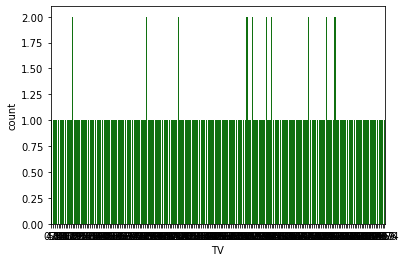

In [13]:
# illustrate count plots
sns.countplot(x='TV',data=df_Sale,color='green')

<AxesSubplot:xlabel='radio', ylabel='count'>

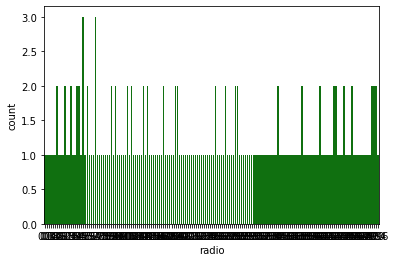

In [14]:
sns.countplot(x='radio',data=df_Sale,color='green')

<AxesSubplot:xlabel='newspaper', ylabel='count'>

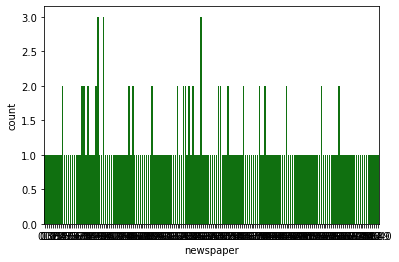

In [15]:
sns.countplot(x='newspaper',data=df_Sale,color='green')

<AxesSubplot:xlabel='sales', ylabel='count'>

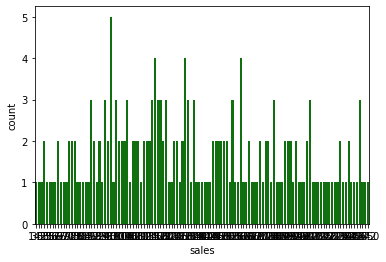

In [16]:
sns.countplot(x='sales',data=df_Sale,color='green')

# bar plot 

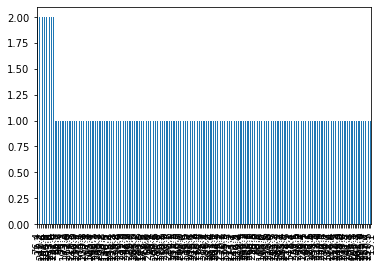

In [17]:
df_Sale['TV'].value_counts().plot.bar()
plt.show()

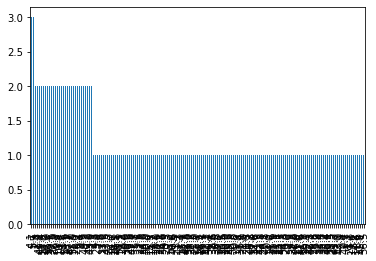

In [18]:
df_Sale['radio'].value_counts().plot.bar()
plt.show()

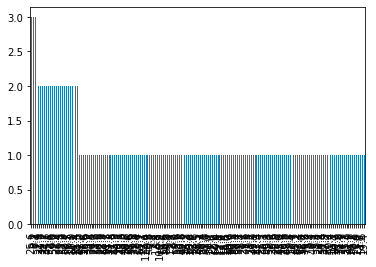

In [19]:
df_Sale['newspaper'].value_counts().plot.bar()
plt.show()

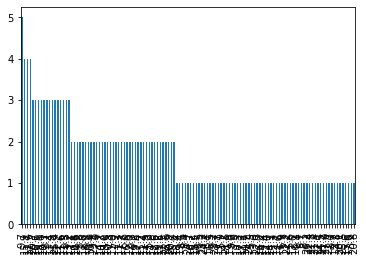

In [60]:
df_Sale['sales'].value_counts().plot.bar()
plt.show()

I tried to visualize the Sales of the particular column uising bar plot as well as Count plot but due to more items the ploting is not clear and so i am moving to check the outliers and skewness by using other respective methods.

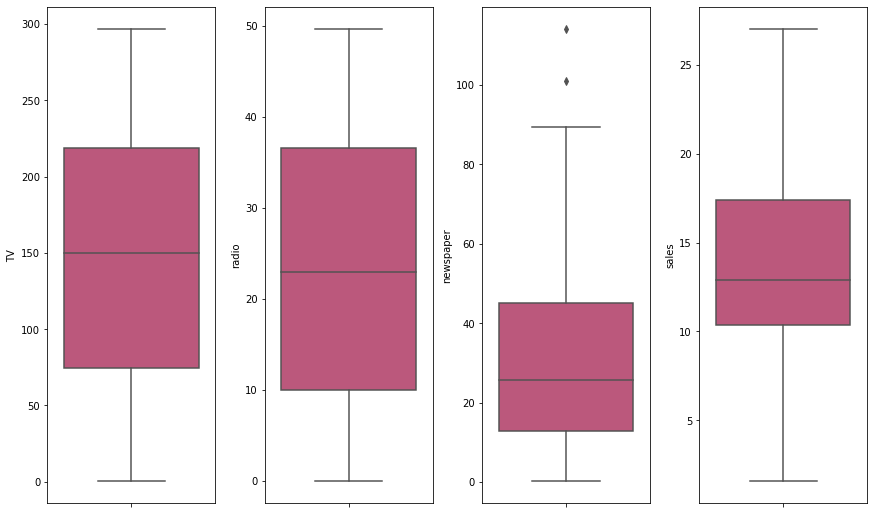

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df_Sale.items():
    sns.boxplot(y=col, data=df_Sale, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

om this box plot we can sense it that not so much outliers are presen tin this dataset and the dataset is pretty clean.

# Pair Plot:

<Figure size 1080x720 with 0 Axes>

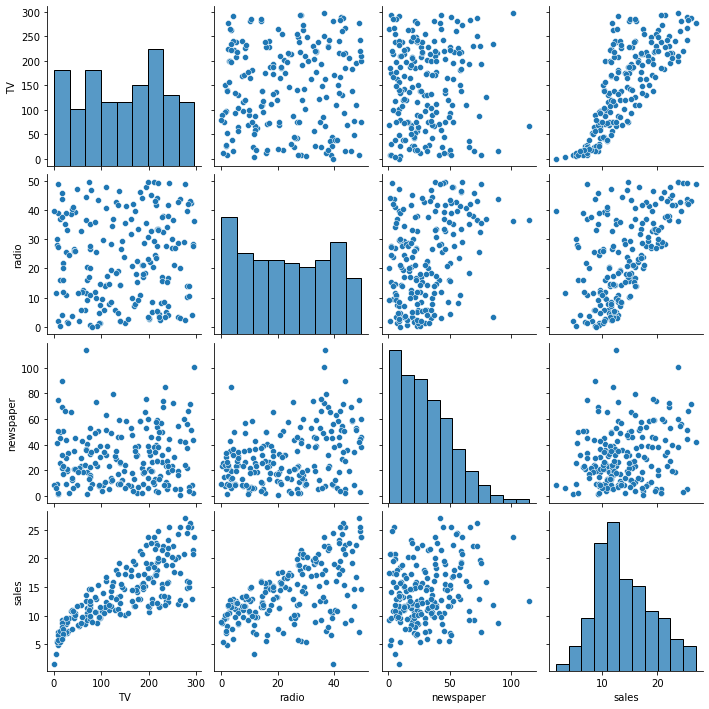

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(df_Sale)
plt.show()

The pair plot shows the data distribution by hist plot and scatter plot.Here we can come to a state that no plenty of outliers are present in the data.

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

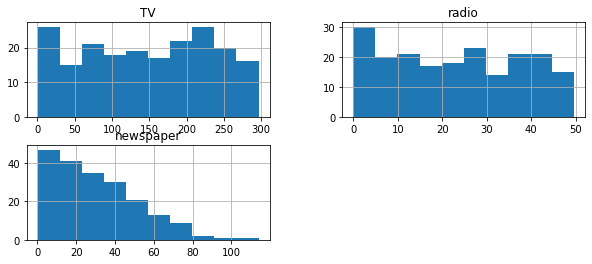

In [22]:
features = ['TV', 'radio','newspaper']
df_Sale[features].hist(figsize=(10, 4))

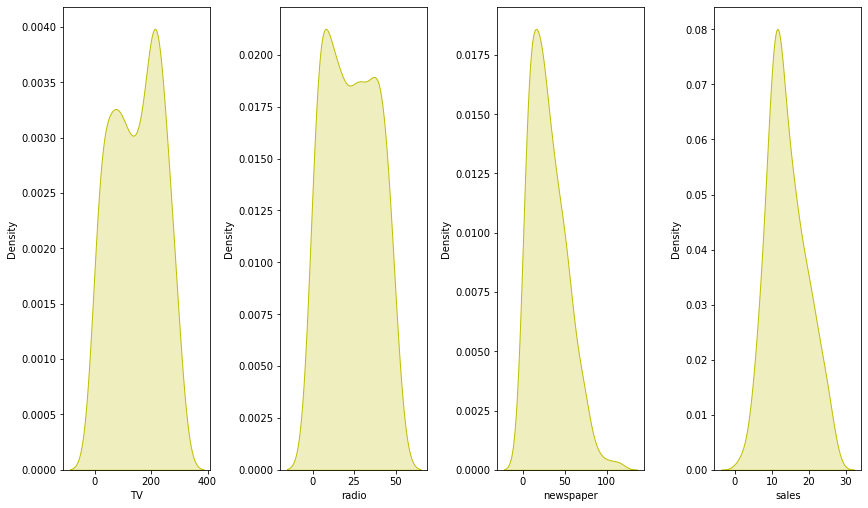

In [23]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df_Sale.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

This dist plot even more clearly shows that all the column curve are some what like normal bell curve.

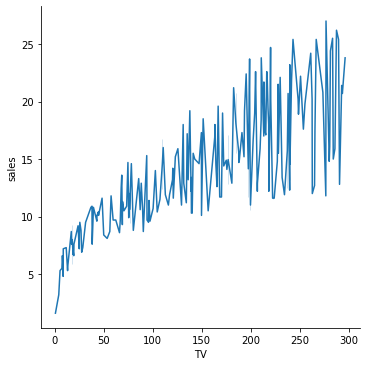

In [24]:
sns.relplot(x="TV", y="sales", kind="line", data=df_Sale)

The line plot for TV vs Sales shows a proper increasing pattern wherein the TV advertisements are playing a major role in the marketing field thus inreasing the sales.

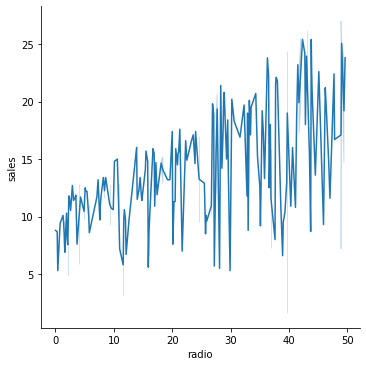

In [25]:
sns.relplot(x="radio", y="sales", kind="line", data=df_Sale)

The line plot for Radio vs Sales do not show a dominant relationship when it comes to sales like the TV option but it is definitely contributing towards the sales parameter.

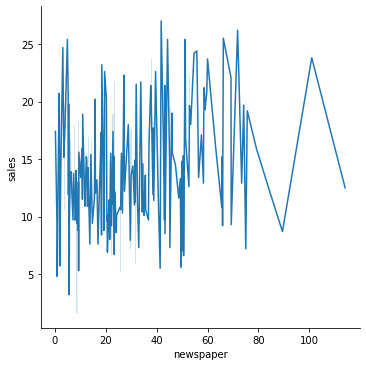

In [26]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df_Sale)

looking at the line plot for Newspaper vs Sales we see a very random trend where in the begin the contribution is way better than towards the end showing that the outliers reflecting in our data are mere flukes where in it contributed towards the sales from that mode of marketing.

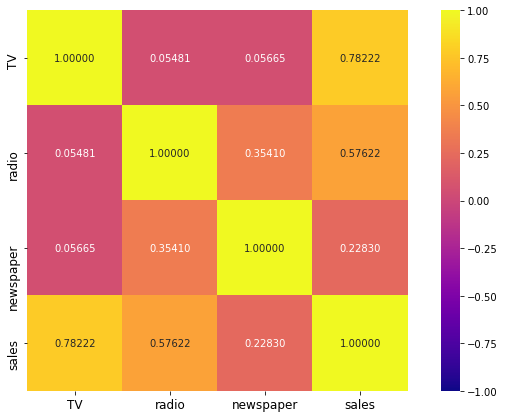

In [27]:
lower_triangle = np.tril(df_Sale.corr())
plt.figure(figsize=(12,7))
sns.heatmap(df_Sale.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="plasma")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the Heat map we can see that almost all columns are positively correleated .

# Spliting into Input and Output Data:

In [28]:
X = df_Sale.drop('sales', axis=1)
Y = df_Sale['sales']

# Standardizing the Input Data:

In [29]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


# Train and Test splitting :

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Regression Model Function

In [31]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [32]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.6611334844530619
R2 Score is: 92.20737408493858
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 3.496739130554232


Created the Linear Regression model and checked it's evaluation metrics.

In [33]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 3.6048001995986403
R2 Score is: 63.30244246991666
Cross Validation Score: 72.20715307684598
R2 Score - Cross Validation Score is -8.90471060692932


In [34]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 3.456407094079052
R2 Score is: 66.26159565701089
Cross Validation Score: 62.652074809515156
R2 Score - Cross Validation Score is 3.6095208474957303


In [35]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3.469898368138584
R2 Score is: 65.99770174667162
Cross Validation Score: 61.92774691532321
R2 Score - Cross Validation Score is 4.0699548313484115


In [36]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 3.4955945053053017
R2 Score is: 65.49223282649066
Cross Validation Score: 62.36713168986109
R2 Score - Cross Validation Score is 3.1251011366295742


In [37]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.14775333985534
R2 Score is: 96.27975198591189
Cross Validation Score: 92.47507781296227
R2 Score - Cross Validation Score is 3.8046741729496176


In [38]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.163231503781359
R2 Score is: 96.17873572196949
Cross Validation Score: 95.86007140956852
R2 Score - Cross Validation Score is 0.31866431240096915


In [39]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.5023096764455866
R2 Score is: 93.62626955897933
Cross Validation Score: 93.00655903059335
R2 Score - Cross Validation Score is 0.6197105283859798


After seeing all the models result we can come to an end of chossing one model for HyperParameter Tuning and that model which i chosee is the Ada Boost Regression Model.

# HyperParameter Tuning:

In [40]:
# Choosing Ada Boost Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

After comparing all the regression models I have selected Ada Boost Regressor as my best model and have listed down it's parameters above referring the sklearn webpage

In [41]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

In [48]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [49]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 111}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [50]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.18348660788863


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Saving the Model:

In [51]:
filename = "FinalModel_6.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_6.pkl']

Finally, I am saving my best regression model using the joblib library.